In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import get_cmap


In [ ]:
# Moved file location –– need to change file paths to match
QID_DATA_DIR = "datasets/2024_questions/with_qid/"
LLAMA_CSV= "2024_llm_questions_gpt-4o-2024-08-06_qid_manual_labels.csv"
GPT_CSV = "2024_llm_questions_Meta-Llama-3.1-70B-Instruct_qid-manual-labels.csv"

In [13]:
llama_df = pd.read_csv(QID_DATA_DIR + LLAMA_CSV)
gpt_df = pd.read_csv(QID_DATA_DIR + GPT_CSV)

In [26]:
def getYesNoPercentage(df):
    sotomayor_yes_count = ((df['justice'] == 'sotomayor') & (df['is_realistic'] == 'Yes')).sum()    # Count "yes"
    print(sotomayor_yes_count)
    sotomayor_no_count = ((df['justice'] == 'sotomayor') & (df['is_realistic'] == 'No')).sum()    # Count "no"
    print(sotomayor_no_count)
    
    alito_yes_count = ((df['justice'] == 'alito') & (df['is_realistic'] == 'Yes')).sum()  # Count "yes"
    print(alito_yes_count)
    alito_no_count = ((df['justice'] == 'alito') & (df['is_realistic'] == 'No')).sum()  # Count "no"
    print(alito_no_count)

    total_count = (sotomayor_yes_count + sotomayor_no_count + alito_yes_count + alito_no_count)

    return sotomayor_yes_count / total_count, sotomayor_no_count / total_count, alito_yes_count / total_count, alito_no_count / total_count

llama_s_yes, llama_s_no, llama_a_yes, llama_a_no = getYesNoPercentage(llama_df)
gpt_s_yes, gpt_s_no, gpt_a_yes, gpt_a_no = getYesNoPercentage(gpt_df)

# Combine into a DataFrame for plotting
percentages = pd.DataFrame({
    'Dataset': ['Llama-70b Sotomayor', 'GPT-4o Sotomayor', 'Llama-70b Alito', 'GPT-4o Alito'],
    'Yes': [llama_s_yes, gpt_s_yes, llama_a_yes, gpt_a_yes],
    'No': [llama_s_no, gpt_s_no, llama_a_no, gpt_a_no]
})


28
36
37
31
16
37
24
38


In [27]:
percentages

,Dataset,Yes,No
0,Llama-70b Sotomayor,0.212121,0.272727
1,GPT-4o Sotomayor,0.139130,0.321739
2,Llama-70b Alito,0.280303,0.234848
3,GPT-4o Alito,0.208696,0.330435


/var/folders/2q/m4kh1c4s3lgdb5lwf1055d3m0000gn/T/ipykernel_17160/2164513556.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_yes = get_cmap('Blues')
/var/folders/2q/m4kh1c4s3lgdb5lwf1055d3m0000gn/T/ipykernel_17160/2164513556.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_no = get_cmap('Reds')


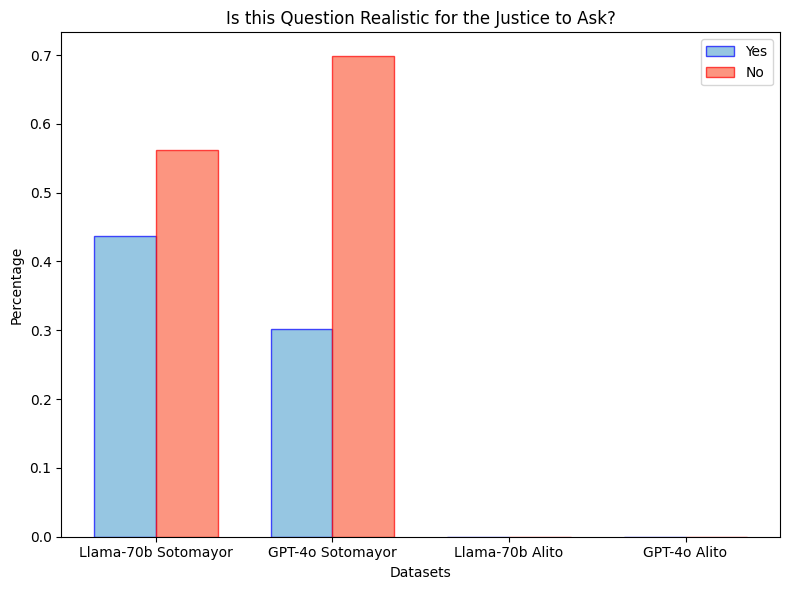

In [58]:
# Plotting
bar_width = 0.35
x = np.arange(len(percentages))

cmap_yes = get_cmap('Blues')
cmap_no = get_cmap('Reds')

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(x - bar_width/2, percentages['Yes'], bar_width, label='Yes',
       color=cmap_yes(0.5), edgecolor='blue', alpha=0.7)
ax.bar(x + bar_width/2, percentages['No'], bar_width, label='No',
       color=cmap_no(0.5), edgecolor='red', alpha=0.7)

# Formatting the plot
ax.set_xlabel('Datasets')
ax.set_ylabel('Percentage')
ax.set_title('Is this Question Realistic for the Justice to Ask?')
ax.set_xticks(x)
ax.set_xticklabels(percentages['Dataset'])
ax.legend()

plt.tight_layout()
plt.show()

In [50]:
percentages

,Dataset,Yes,No
0,Llama-70b Sotomayor,NaN,NaN
1,GPT-4o Sotomayor,NaN,NaN
2,Llama-70b Alito,NaN,NaN
3,GPT-4o Alito,NaN,NaN


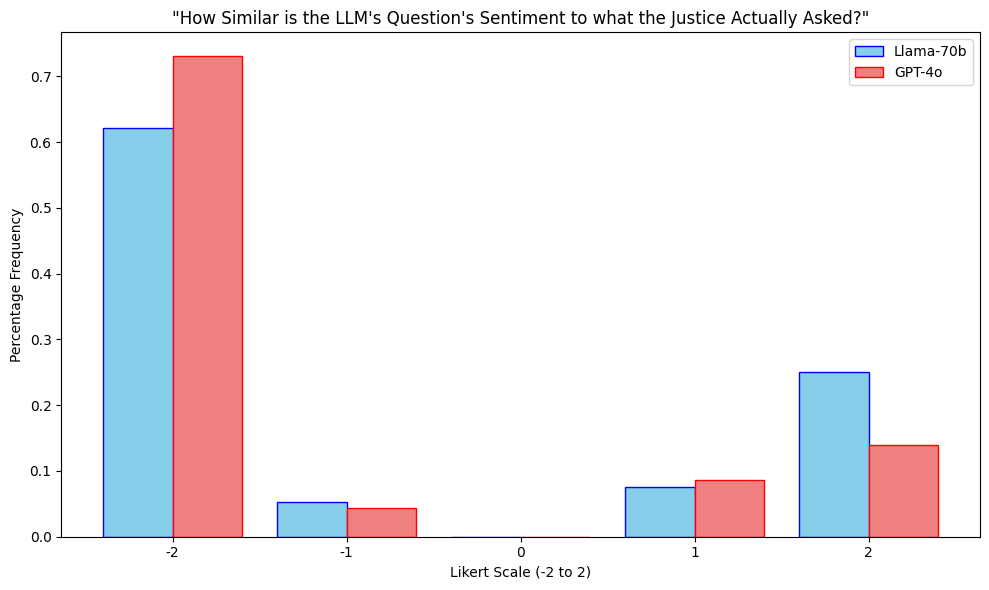

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df1 = llama_df.dropna(subset=['how_similar_sentiment'])
df2 = gpt_df.dropna(subset=['how_similar_sentiment'])

# Count the frequency of each response
counts1 = df1['how_similar_sentiment'].value_counts().reindex(range(-2, 3), fill_value=0)
counts2 = df2['how_similar_sentiment'].value_counts().reindex(range(-2, 3), fill_value=0)

# Combine counts into a single DataFrame
data = pd.DataFrame({'Llama-70b': counts1/counts1.sum(), 'GPT-4o': counts2/counts2.sum()})

# Plotting
bar_width = 0.4
x = np.arange(len(data.index))

fig, ax = plt.subplots(figsize=(10, 6))

# Diverging bars
ax.bar(x - bar_width/2, data['Llama-70b'], bar_width, label='Llama-70b', color='skyblue', edgecolor='blue')
ax.bar(x + bar_width/2, data['GPT-4o'], bar_width, label='GPT-4o', color='lightcoral', edgecolor='red')

# Formatting
ax.set_xticks(x)
ax.set_xticklabels(data.index)
ax.set_xlabel('Likert Scale (-2 to 2)')
ax.set_ylabel('Percentage Frequency')
ax.set_title('"How Similar is the LLM\'s Question\'s Sentiment to what the Justice Actually Asked?"')
ax.legend()

plt.tight_layout()
plt.show()


In [22]:
llama_df.head()

,Unnamed: 0,question_id,transcript_id,question_addressee,justice,question_text,opening_statement,full_text,is_realistic,how_similar,how_similar_sentiment,how_helpful,how_prefer_to_actual
0,0,q_f4341b19,2024.23-621-t01,petitioner,sotomayor,Can you elaborate on why a preliminary injunct...,<speaker>Erika L. Maley</speaker><text> Mr. Ch...,"<speaker>John G. Roberts, Jr.</speaker><text> ...",Yes,-2.0,1.0,-1.0,-2.0
1,1,q_bb41909e,2024.23-621-t01,petitioner,sotomayor,In cases where a preliminary injunction result...,<speaker>Erika L. Maley</speaker><text> Mr. Ch...,"<speaker>John G. Roberts, Jr.</speaker><text> ...",No,-2.0,-2.0,-2.0,-2.0
2,2,q_61c81902,2024.23-621-t01,petitioner,sotomayor,How do you address situations where the only r...,<speaker>Erika L. Maley</speaker><text> Mr. Ch...,"<speaker>John G. Roberts, Jr.</speaker><text> ...",No,-2.0,-2.0,-2.0,-2.0
3,3,q_f1f17a25,2024.23-621-t01,petitioner,sotomayor,What impact would your proposed bright-line ru...,<speaker>Erika L. Maley</speaker><text> Mr. Ch...,"<speaker>John G. Roberts, Jr.</speaker><text> ...",No,-2.0,-2.0,-2.0,-2.0
4,4,q_40a17162,2024.23-621-t01,petitioner,sotomayor,Are there specific precedents from this Court ...,<speaker>Erika L. Maley</speaker><text> Mr. Ch...,"<speaker>John G. Roberts, Jr.</speaker><text> ...",Yes,-2.0,-2.0,-2.0,-2.0


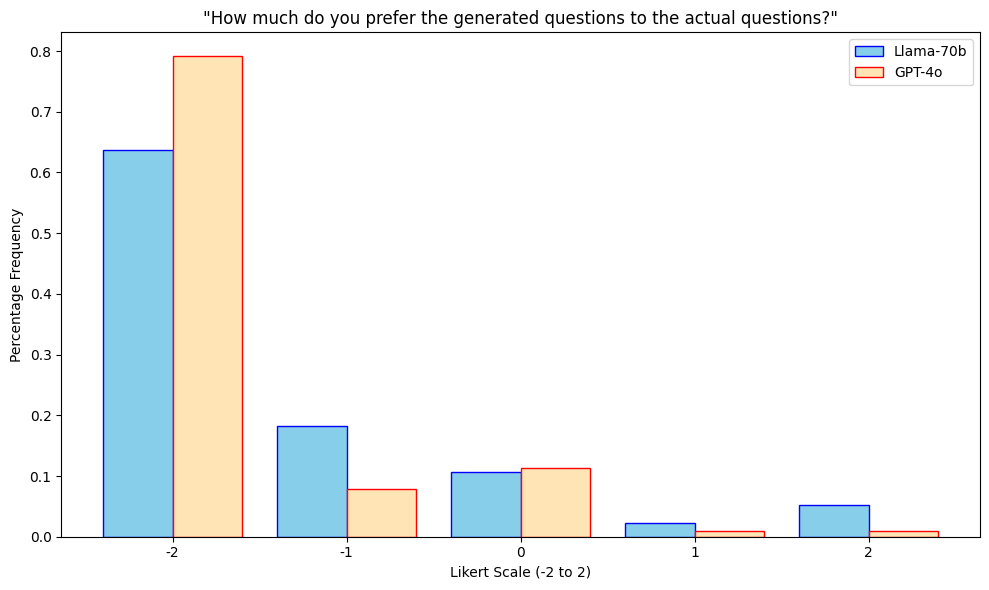

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df1 = llama_df.dropna(subset=['how_prefer_to_actual'])
df2 = gpt_df.dropna(subset=['how_prefer_to_actual'])

# Count the frequency of each response
counts1 = df1['how_prefer_to_actual'].value_counts().reindex(range(-2, 3), fill_value=0)
counts2 = df2['how_prefer_to_actual'].value_counts().reindex(range(-2, 3), fill_value=0)

# Combine counts into a single DataFrame
data = pd.DataFrame({'Llama-70b': counts1/counts1.sum(), 'GPT-4o': counts2/counts2.sum()})

# Plotting
bar_width = 0.4
x = np.arange(len(data.index))

fig, ax = plt.subplots(figsize=(10, 6))

# Diverging bars
ax.bar(x - bar_width/2, data['Llama-70b'], bar_width, label='Llama-70b', color='skyblue', edgecolor='blue')
ax.bar(x + bar_width/2, data['GPT-4o'], bar_width, label='GPT-4o', color='moccasin', edgecolor='red')

# Formatting
ax.set_xticks(x)
ax.set_xticklabels(data.index)
ax.set_xlabel('Likert Scale (-2 to 2)')
ax.set_ylabel('Percentage Frequency')
ax.set_title('"How much do you prefer the generated questions to the actual questions?"')
ax.legend()

plt.tight_layout()
plt.show()


In [27]:
print(counts2)

how_similar
-2.0    90
 2.0    16
-1.0    15
 1.0    11
Name: count, dtype: int64
